<a href="https://colab.research.google.com/github/EricAshby/BoardGameGeek_Database_EDA/blob/main/BGG_EDA_EricAshby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis of BoardGameGeek's Board Game Database
Eric D. Ashby



##Introduction





BoardGameGeek (BGG) is a board game focused online resource and community that, among other functions, records and collects information and ratings on board games published worldwide. Users can create a profile to rate any boardgame on their site. BGG publishes collects, aggregates, and publishes these ratings along with descriptions of the board games to give board game enthusiasts a better understanding of what games they may or may not enjoy. This data set is a portion of BGG's database obtained from kaggle.com, posted by user Jen Wadkins, last updated in January of 2022.⁰

The purpose of this analysis is to extract information useful to board game designers and publishers so they can make informed decisions about the design and theming of their board games.

    ⁰ Wadkins, Jen. (2022, January 17). Board Game Database from BoardGameGeek. Kaggle. https://www.kaggle.com/datasets/threnjen/board-games-database-from-boardgamegeek

##Analysis Goals


This analysis will investigate the games, mechanics, themes, and ratings contained in the data set and explore how they relate.

The goals of this analysis are to answer the following questions:
*  Which board game mechanics appear most commonly together?
*  Do games with commonly paired mechanics tend to have better ratings than games with uncommon pairings, on average?
*  Which mechanics have the highest and lowest ratings associated with them, on average?
*  Which themes have the highest and lowest average ratings?
*  How do player count, play time, and rating relate to each other?
*  Which theme-mechanic pairings have the highest average rating?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

games_df = pd.read_csv('games.csv')
mechanics_df = pd.read_csv('mechanics.csv')
themes_df = pd.read_csv('themes.csv')

##Overview

###A First Look

Taking a brief look at our data, we have the first 5 rows of the games table. This table contains 48 columns so displayed is an abbreviated table. Related to our analysis are the BoardGameGeek ID column, `BGGId`; the name column, `Name`; the maximum and minumum player count columns, `MaxPlayers` and `MinPlayers`; the game duration columns, `MfgPlaytime`, `ComMinPlaytime`, and `ComMaxPlaytime`; the average rating column, `AvgRating`; and the Bayesian averaged rating column, `BayesAvgRating`. The BGGId will act as the primary key for this table and foreign key to the remaining tables.

While BGGId, name, and max/min player count are fairly self explanatory, other columns may need some explanation.

As can be found in the data's documentation, the game duration columns `MfgPlayTime`, `ComMinPlaytime`, and `ComMaxPlaytime` are the maufacturer's stated play time, the community minimum play time, and community maximum play time. The community play times are the play times reported to BGG by BGG users regarding their own playing experience with a game.

The average rating column, `AvgRating`, is the average rating out of ten as voted by BGG users. The Bayesian average rating, `BayesAvgRating`, is the average rating weighted to give a more realistic score by assuming the game recieved 30 additional reviews of average (across all games) score.¹

    ¹ Karp, Daniel. (2005, Januart 18). [To get the Bayesian average rating of a game] [Comment on the post "Bayesian?"]. BoardGameGeek. https://boardgamegeek.com/thread/55210/bayesian

In [ ]:
games_df.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0


Here, we examine the first 5 rows of the mechanics table. This table contains 158 columns so is also abbreviated. The columns in this table represent the various game mechanics listed by BGG. The data therein consists of boolean tags, 0 for false and 1 for true, indicating which mechanics are used by each game.

In [ ]:
mechanics_df.head()

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The themes table is much the same as above with 218 columns (displayed abbreviated) representing the various themes listed on BGG. Contained in the table are binary (Boolean) tags indicating which themes are present in each game.

In [ ]:
themes_df.head()

,BGGId,Adventure,Fantasy,Fighting,Environmental,Medical,Economic,Industry / Manufacturing,Transportation,Science Fiction,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###The Metadata

Below is the meta data for the games, mechanics, and themes tables, respectively. The full spread of info is displayed for the games table but the mechanics and themes tables, it seems, are too long for Google Colab to display in their entirety so a summary is displayed instead.  In each, there are 21,925 records. There are a few holes in the records in the games table, though not in the columns we are interested in.

In [ ]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant              21925 non-null 

In [ ]:
mechanics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 158 entries, BGGId to Physical
dtypes: int64(158)
memory usage: 26.4 MB


In [ ]:
themes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 218 entries, BGGId to Theme_Flags identification
dtypes: int64(218)
memory usage: 36.5 MB


###A Quick Check for Duplicates

This data has already been cleaned (somewhat), but it would not be prudent to neglect checking for duplicates. The code below checks for the number of duplicates in each table, based on the BGG ID. As can be seen below, we find that there are no duplicates.

In [ ]:
print('Duplicates in games table:', games_df.duplicated(subset = 'BGGId').sum())
print('Duplicates in mechanics table:', mechanics_df.duplicated(subset = 'BGGId').sum())
print('Duplicates in themes table:', themes_df.duplicated(subset = 'BGGId').sum())

Duplicates in games table: 0
Duplicates in mechanics table: 0
Duplicates in themes table: 0


###Descriptive Statistics

The abbreviated descriptive statistics for the games, mechanics, and themes tables are shown here. While this data set is quite clean already, we can see some signs of dirty data in the extrema of the `MinPlayers` and `MaxPlayers` columns. Player counts of 0 and 999 do not seem reasonable in the context of board games. We will discuss this in the next section.

In [ ]:
games_df.describe()

,BGGId,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,16395.000000,16034.000000,...,21925.000000,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,1985.494914,1.982131,6.424922,5.685673,1.516374,2.007343,5.707868,10.004391,216.461819,...,21295.352201,21062.680274,0.055827,0.10577,0.161003,0.105633,0.013820,0.050855,0.029190,0.040182
std,104628.721777,212.486214,0.848983,0.932477,0.365311,0.285578,0.693093,15.014643,3.269157,236.595136,...,3637.139987,4219.776597,0.229592,0.30755,0.367542,0.307374,0.116745,0.219707,0.168344,0.196391
min,1.000000,-3500.000000,0.000000,1.041330,3.574810,0.196023,0.000000,0.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,2001.000000,1.333300,5.836960,5.510300,1.320720,2.000000,4.000000,8.000000,24.027778,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,2011.000000,1.968800,6.453950,5.546540,1.476880,2.000000,4.000000,10.000000,138.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,2017.000000,2.525200,7.052450,5.679890,1.665470,2.000000,6.000000,12.000000,351.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,2021.000000,5.000000,9.914290,8.514880,4.277280,10.000000,999.000000,21.000000,1757.000000,...,21926.000000,21926.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
mechanics_df.describe()

,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,0.001688,0.074755,0.052771,0.295827,0.205063,0.054002,0.018335,0.111197,0.001870,...,0.006249,0.000228,0.000867,0.002828,0.000684,0.002919,0.000730,0.001460,0.050399,0.020935
std,104628.721777,0.041046,0.263001,0.223581,0.456424,0.403757,0.226027,0.134164,0.314383,0.043204,...,0.078802,0.015100,0.029426,0.053103,0.026148,0.053950,0.027005,0.038177,0.218772,0.143170
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
themes_df.describe()

,BGGId,Adventure,Fantasy,Fighting,Environmental,Medical,Economic,Industry / Manufacturing,Transportation,Science Fiction,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,0.053683,0.123238,0.076078,0.008848,0.003968,0.069282,0.013546,0.018016,0.076397,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
std,104628.721777,0.225396,0.328718,0.265128,0.093651,0.062869,0.253938,0.115600,0.133012,0.265638,...,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Cleaning the Data

As we noticed above, there seem to be some indicators of dirty data in the descriptive statistics for the game table.  We will address the suspect data in this section.

Listed below are the games in the data set with a minimum player count reported to be zero. Zero is an unlikely number of players and, upon some investigation into a number of the games below via the BoardGameGeek website, it seems as though the data set uses '0' as a placeholder for when the record lacks this information, either by nature of the game, as in 'Nix' (BGGId 6880), or from lack of adequate record of the game, as in 'Monopoly: Marvel Comics' (BGGId 11950).

In [ ]:
games_df[games_df['MinPlayers'] == 0]

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
1687,2356,Scrabble Sentence Cube Game,player turn roll word cube set timer form se...,1971,1.2000,4.74714,5.43432,1.710570,0,0,...,21926,21926,0,0,0,0,0,0,0,0
2003,2860,Piecepack,piecepack board game standard deck playing car...,2001,2.4000,7.03704,5.65028,1.711390,0,0,...,21926,21926,0,0,0,0,0,1,0,0
2676,4087,1812: The Campaign of Napoleon in Russia,version include separate map cover russia stra...,1972,2.1667,6.89412,5.55042,1.438840,0,0,...,21926,21926,0,0,1,0,0,0,0,0
3550,5985,Miscellaneous Game Accessory,nt game categorize miscellaneous game relate i...,0,3.3000,7.13812,5.67825,2.578210,0,0,...,21926,21926,0,0,1,0,0,0,0,0
3727,6540,Fear God and Dread Nought,fear god amp dread nought complete admirality ...,2001,4.2917,7.37087,5.59524,1.572310,0,0,...,21926,21926,0,0,1,0,0,0,0,0
3871,6880,Nix,nice set blank card great want prototype game ...,1999,1.0000,3.63158,5.45413,2.737850,0,0,...,21926,21926,0,0,0,0,0,0,0,0
3984,7159,The Boardgame Book,edition knapp cavendish publish come slipcas...,1979,0.0000,7.53617,5.55362,1.450080,0,0,...,21926,21926,0,0,0,0,0,0,0,0
5131,10904,New Rules for Classic Games,book offer large number variation classic boar...,1992,2.0000,7.48615,5.61040,1.723890,0,0,...,21926,21926,0,0,0,0,0,0,0,0
5149,10971,Board and Table Games from Many Civilizations,anybody look game section bookshop see work or...,1960,2.3333,7.47806,5.54329,1.394200,0,0,...,21926,21926,0,0,0,0,0,0,0,0
5150,10973,Dice Games Properly Explained,reiner knizias paperback book dice game run ...,1999,1.8182,6.75740,5.59074,1.489860,0,0,...,21926,21926,0,0,0,0,0,0,0,0


Whatever the reason, since zero players does not make sense in the context of our questions, the data will need to be cleaned. Instead of simply removing the offending rows from the data set, we can simply replace '0' with null values in these columns. This way, calculations in these columns will disregard these entries but we retain all the remaining data in said entries.

Before we do this, however, let's take a look at the entries with 0 as the maximum player count (displayed below). Right off the bat, we can see some logical errors in these values. How can the maximum number of players be zero when the minimum is greater than zero? This suggests that there may be some errors in how the `MaxPlayers` and `MinPlayers` were recorded.

In [ ]:
games_df[games_df['MaxPlayers'] == 0]

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
740,920,Ultimate Outburst,ultimate ouburst superset original outburst fe...,1999,1.3704,6.11843,5.57847,1.41017,2,0,...,21926,21926,0,0,0,0,0,0,0,0
1149,1540,BattleTech,battletech aka quotbtquot sciencefiction tacti...,1985,3.4178,7.06585,6.48108,1.60941,2,0,...,21926,21926,1,0,1,0,0,0,0,0
1184,1585,Burma: The Campaign in Northern Burma,burma campaign northern burma marchaugust ...,1999,4.0189,7.86609,5.86459,1.38749,1,0,...,21926,21926,0,0,1,0,0,0,0,0
1639,2285,Dark Future,apocalyptic future car racingsimilar style aut...,1988,2.3077,5.93433,5.54101,1.74331,2,0,...,21926,21926,1,0,0,0,0,0,0,0
1687,2356,Scrabble Sentence Cube Game,player turn roll word cube set timer form se...,1971,1.2000,4.74714,5.43432,1.71057,0,0,...,21926,21926,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18904,254157,Last Days: Zombie Apocalypse,day zombie apocalypse skirmishscale miniature ...,2018,2.0000,7.77826,5.55051,1.75436,2,0,...,21926,21926,0,0,0,0,0,0,0,0
19496,263996,Melee & Wizard,originally release release fantasy trip se...,2018,2.5000,8.37273,5.54661,1.33269,2,0,...,21926,21926,0,0,0,0,0,0,0,0
19581,265715,METAL,metal tabletop game entirely solid metal inclu...,2019,1.0000,6.33333,5.51584,1.88160,0,0,...,21926,21926,0,0,0,0,0,0,0,0
19589,265832,WTF?,wicked party game adult know betterwtf fastmov...,2017,1.3333,4.74062,5.48238,1.96132,3,0,...,21926,21926,0,0,0,0,0,0,0,0


Below, we can examine the entries for which the maximum numper of players is recorded as less than the minimum number of players. There are 132 rows where this turns out to be true.

In [ ]:
MaxLessThanMinFilter = games_df['MaxPlayers'] < games_df['MinPlayers']
games_df[MaxLessThanMinFilter]

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
740,920,Ultimate Outburst,ultimate ouburst superset original outburst fe...,1999,1.3704,6.11843,5.57847,1.41017,2,0,...,21926,21926,0,0,0,0,0,0,0,0
1149,1540,BattleTech,battletech aka quotbtquot sciencefiction tacti...,1985,3.4178,7.06585,6.48108,1.60941,2,0,...,21926,21926,1,0,1,0,0,0,0,0
1184,1585,Burma: The Campaign in Northern Burma,burma campaign northern burma marchaugust ...,1999,4.0189,7.86609,5.86459,1.38749,1,0,...,21926,21926,0,0,1,0,0,0,0,0
1639,2285,Dark Future,apocalyptic future car racingsimilar style aut...,1988,2.3077,5.93433,5.54101,1.74331,2,0,...,21926,21926,1,0,0,0,0,0,0,0
2347,3472,Plagio,half famous book quotincipitquot read player s...,1999,2.0000,6.52548,5.54016,1.55405,4,0,...,21926,21926,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18864,253399,Journal 29: Interactive Book Game,journal unique book game solve puzzle submi...,2017,2.5385,7.03678,5.84117,1.40816,1,0,...,21926,21926,0,0,0,0,0,0,0,0
18904,254157,Last Days: Zombie Apocalypse,day zombie apocalypse skirmishscale miniature ...,2018,2.0000,7.77826,5.55051,1.75436,2,0,...,21926,21926,0,0,0,0,0,0,0,0
19496,263996,Melee & Wizard,originally release release fantasy trip se...,2018,2.5000,8.37273,5.54661,1.33269,2,0,...,21926,21926,0,0,0,0,0,0,0,0
19589,265832,WTF?,wicked party game adult know betterwtf fastmov...,2017,1.3333,4.74062,5.48238,1.96132,3,0,...,21926,21926,0,0,0,0,0,0,0,0


In all of the entries shown by Google Colab, the `MaxPlayers` column contains a zero. To check if this is true for all 132 rows, we can use the following code. This code displays the maximum value contained in the `MaxPlayers` column for the 132 aforementioned rows. Evidently, for all entries for which the minimum player count exceeds the maximum player count, the maximum number of players is recorded to be zero. This corroborates our conclusion that missing information was entered in as zero in this data set.

In [ ]:
games_df[MaxLessThanMinFilter]['MaxPlayers'].max()

0

To fix this and for the purposes of this analysis, we will impute the missing `MaxPlayers` values using the `MinPlayers`, `GoodPlayers`, and `BestPlayers` columns. The latter two columns are the player counts voted by the community to be good or the best, respectively. The `GoodPlayers` column in particular contains a list of player counts, rather than a single value.

The code below shows these columns for our 132 rows.

In [ ]:
games_df[MaxLessThanMinFilter][['GoodPlayers','BestPlayers']]

,GoodPlayers,BestPlayers
740,[],0
1149,[],4
1184,[],0
1639,[],0
2347,[],0
...,...,...
18864,[],0
18904,[],0
19496,[],0
19589,[],0


It seems there are no entries for the `GoodPlayers` column for these 132 entries. The code below confirms this by counting the number of times a distinct entry shows up in these rows. The only entry present in this column for these rows is an empty list, denoted by "[ ]". Therefore, we will not consider this row in our imputation.

In [ ]:
(games_df[games_df['MaxPlayers'] < games_df['MinPlayers']]['GoodPlayers']).value_counts()

[]    132
Name: GoodPlayers, dtype: int64

Below, we have code to replace the maximum player count with the "best" player count if the latter exceeds the former.

In [ ]:
#create filter for entries with MaxPlayers < BestPlayers
BestMoreThanMaxFilter = games_df['MaxPlayers'] < games_df['BestPlayers']

#if BestMoreThanMax, replace MaxPlayers with BestPlayers
games_df.loc[BestMoreThanMaxFilter,'MaxPlayers'] = games_df.loc[BestMoreThanMaxFilter,'BestPlayers']

Now we cover the cases where the minimum still exceeds the maximum with this code:

In [ ]:
#update MaxLessThanMinFilter
MaxLessThanMinFilter = games_df['MaxPlayers'] < games_df['MinPlayers']

#if MaxLessThanMin, replace MaxPlayers with BestPlayers
games_df.loc[MaxLessThanMinFilter,'MaxPlayers'] = games_df.loc[MaxLessThanMinFilter,'MinPlayers']

Now, for the cases in which we have a non-zero player maximum but no minimum we will, for the purposes of this analysis, assume that the maximum and minimum player counts are the same. The following code does just that.

In [ ]:
games_df.loc[(games_df['MinPlayers'] == 0), 'MinPlayers'] = games_df['MaxPlayers']

Now that both the `MaxPlayers` and `MinPlayers` columns have been imputed as best they can be with the available data, we can now replace the remaining zeros with null values as decided previously. The code below replaces the zeros in the `MinPlayers` and `MaxPlayers` columns with null values.

In [ ]:
games_df['MinPlayers'].replace(0, None, inplace = True)
games_df['MinPlayers'] = pd.to_numeric(games_df['MinPlayers'], errors='coerce')
games_df['MaxPlayers'].replace(0, None, inplace = True)
games_df['MaxPlayers'] = pd.to_numeric(games_df['MaxPlayers'], errors='coerce')

Before we move on to the analysis, let's examine the games with the unreasonably high maximum player count of 999. Some research into these games reveals that the number 999 seems to act as a placeholder for "unlimited". As such, the player count is not incorrect so it will remain as it is.  However, for the purposes of this analysis, games like this are clearly outliers in the set and may be filtered out for certain parts of the analysis.

In [ ]:
games_df[games_df['MaxPlayers'] == 999]

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
7327,24996,Start Player: A Kinda Collectible Card Game,start player kinda collectible card game quott...,2006,1.0000,6.49475,5.59433,1.94710,2.0,999.0,...,383,21926,0,0,0,1,0,0,1,0
7743,28567,"I Don't Know, What Do You Want to Play?",unique game component consist card game collec...,2007,1.0588,6.80690,5.56771,2.11968,2.0,999.0,...,21926,21926,0,0,0,0,0,0,0,0
15467,189890,Scrimish Card Game,scrimish fast move card game pit player player...,2015,1.1250,5.92578,5.54735,1.52252,2.0,999.0,...,21926,21926,0,0,0,0,0,0,0,0


##Analysis

###Which board game mechanics appear most commonly together?

To answer this question, we will calculate the phi coefficients between each pair of game mechanics in the mechanics table. The phi coefficient is a measure of correlation, ranging from -1 to 1, that is used to describe the ralationship between two variables, especially binary variables such as those in our table. A phi coefficient of 1 represents a perfect positive correlation, -1 a perfect negative correlation, and 0 representing no correlation at all.

In the code below, we create a function that caclulates phi coefficients.

In [ ]:
def phi_coeff(df_vector1, df_vector2):
  #create contingency table
  contingency_table = pd.crosstab(df_vector1, df_vector2)

  #rename cells in contingency table
  a = contingency_table.iloc[1, 1]
  b = contingency_table.iloc[0, 1]
  c = contingency_table.iloc[1, 0]
  d = contingency_table.iloc[0, 0]

  #calculate phi coefficient
  numerator = a * d - b * c
  denominator = ((a + b) * (a + c) * (d + b) * (d + c))**0.5

  phi = numerator / denominator

  #return phi coefficient
  return phi

Now we can create a table into which we will put our phi coefficients, using another function which we will define here.

In [ ]:
#create function to create table of phi coefficients
def phi_coeff_table(df):
  #create a table of zeros with dimensions equal to the number of mechanics squared
  numCols = len(df.columns)
  phi_matrix = np.zeros((numCols, numCols))

  print('Beginning calculations...')# for progress indicator

  #calculate phi coefficients for each pair of columns
  for i in range(numCols):

    #progress indicator
    clear_output()
    print(str(i) + '/' + str(numCols), 'columns complete')

    for j in range(i, numCols):
      phi = phi_coeff(df.iloc[:, i], df.iloc[:, j])
      phi_matrix[i, j] = phi
      phi_matrix[j, i] = phi #since the resulting table is symmetric

  #clear progress indicator
  clear_output()

  #generate dataframe from phi_matrix
  phi_table = pd.DataFrame(phi_matrix, index = df.columns, columns = df.columns)

  #return phi table
  return phi_table

The code below creates a table of phi coefficients for each pairing of each of the game mechanics in the mechanics table.

In [ ]:
#create copy of mechanics_df with `BGGId` column dropped
mechanics_bool_df = mechanics_df.drop(columns = ['BGGId'])

#create table of phi coefficients
mechanics_phi_df = phi_coeff_table(mechanics_bool_df)

mechanics_phi_df

,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,Set Collection,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
Alliances,1.000000,0.055917,0.039997,0.009871,0.003888,0.014759,-0.005619,-0.000404,-0.001780,0.000021,...,-0.003260,0.072971,0.036553,0.018736,0.126418,-0.002225,0.040038,-0.001572,-0.009472,-0.006012
Area Majority / Influence,0.055917,1.000000,0.043833,-0.002987,0.074268,0.021860,-0.028505,-0.070199,0.011782,0.004467,...,-0.002732,0.007192,0.038779,0.027320,0.045624,0.039269,-0.001259,-0.006324,-0.044872,-0.028240
Auction/Bidding,0.039997,0.043833,1.000000,-0.092644,-0.001646,0.021228,0.030087,-0.071157,-0.000773,0.137234,...,-0.003183,-0.003565,-0.006951,0.006639,0.025032,-0.008990,0.001176,-0.009024,-0.042254,-0.021690
Dice Rolling,0.009871,-0.002987,-0.092644,1.000000,-0.145545,-0.052728,-0.081132,0.278384,-0.002611,-0.115043,...,-0.008279,0.003447,0.014873,-0.011933,-0.005494,-0.016547,-0.010115,0.001397,-0.058875,-0.054294
Hand Management,0.003888,0.074268,-0.001646,-0.145545,1.000000,0.076073,0.035841,-0.152697,0.012008,0.104218,...,0.007034,-0.000189,0.011916,0.047410,0.008313,0.001834,0.007191,0.019051,-0.085509,-0.007199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rondel,-0.002225,0.039269,-0.008990,-0.016547,0.001834,-0.001706,-0.007395,-0.013760,0.036795,0.042960,...,0.049353,-0.000817,-0.001593,-0.002881,-0.001416,1.000000,0.029845,-0.002069,-0.012465,-0.007912
Automatic Resource Growth,0.040038,-0.001259,0.001176,-0.010115,0.007191,0.001016,-0.003693,-0.009559,0.037925,-0.000788,...,0.040725,-0.000408,-0.000796,-0.001439,-0.000707,0.029845,1.000000,-0.001033,-0.006226,-0.003952
Legacy Game,-0.001572,-0.006324,-0.009024,0.001397,0.019051,0.001437,-0.005225,-0.002122,0.108961,-0.001114,...,-0.003032,-0.000577,-0.001126,0.042962,-0.001000,-0.002069,-0.001033,1.000000,-0.008808,0.002755
Dexterity,-0.009472,-0.044872,-0.042254,-0.058875,-0.085509,-0.008000,-0.028377,-0.080160,-0.009972,-0.037301,...,-0.018268,0.010328,-0.006785,-0.012268,-0.006028,-0.012465,-0.006226,-0.008808,1.000000,0.036212


Now, using the code below, we can create a function to generate a table including each phi coefficient along with its location in the phi coefficient table.

In [ ]:
#define fucntion to create a an index for phi coefficients in a phi_table
#function will not include the trivial diagonal
def phi_indexer(df, index1:str, index2:str):
  #initialize emptly list
  phi_index = []
  #create rows with each phi recorded along with their indeces
  for i in range(len(df.columns)):
    for j in range(i, len(df.columns)):
      if i != j: #exclude the diagonal (indeces are the same)
        phi_index.append({index1 : df.columns[i], index2 : df.columns[j], 'phi' : df.iloc[i,j]})
  #convert into dataframe
  phi_index_df = pd.DataFrame(phi_index, columns = [index1, index2, 'phi'])
  return phi_index_df

Thus, we have a list of top 5 phi coefficients for each (non-trivial) pairing of game mechanics as displayed by the code below.  That is to say, these are **the top 5 most commonly paired game mechanics** in data set: **Hexagon Grid & Simulation, Ratio/Combat Results Table & Zone of Control, Negotiation & Trading, Movement Points & Ratio/Combat Results Table,** and **Scenario/Mission/Campaign Game & Movement Points.**

In [ ]:
mechanics_phi_index_df = phi_indexer(mechanics_phi_df, 'Mechanic1', 'Mechanic2')

mechanics_phi_index_df.sort_values(by = 'phi', ascending = False).head()

,Mechanic1,Mechanic2,phi
1108,Hexagon Grid,Simulation,0.462397
7715,Ratio / Combat Results Table,Zone of Control,0.448845
3468,Negotiation,Trading,0.436503
5934,Movement Points,Ratio / Combat Results Table,0.427178
5230,Scenario / Mission / Campaign Game,Movement Points,0.401518


It should be noted that these are not necessarily the most common mechanics, they are the mechanic pairs that correlate most strongly with eachother. That is, these are the mechanic pairs that are most likely to show up *as pairs*, not the mechanics most likely to show up overall.

Some of these game mechanics, such as negotiation and trading, are easy to understand. Others, for those outside the industry/hobby, may warrant some explanation. Hex Grid refers to the style of board used by the game—a hexagonal grid, as opposed to a square one. Simulation games are games that aim to simulate a real world event or scenario. Ratio/Combat Results Tables are tables used in wargames (typically) to determine outcomes of combat between players based on various factors, depending on the game. Zone of Control refers to a mechanic where a unit in a board game has influence on the spaces around it. Movement points are points available for a player to spend to move in a game, typically each turn. Finally, Scenario/Mission/Campaign Games are games where each playthrough is a different scenario/mission and/or progresses the players through a greater campaign arc than can be experienced through a single playthrough.

The code below creates a new column in the table above that contains the names of both mechanics. Displayed, afterward, is a bar graph of our top 5 results using the new column.

In [ ]:
#define a column merging function
def merge_mechanics_columns(row):
  return row['Mechanic1'] + ' - ' + row['Mechanic2']
#apply the function to merge the mechanics columns
mechanics_phi_index_df['Mechanic_Pairing'] = mechanics_phi_index_df.apply(merge_mechanics_columns, axis = 1)

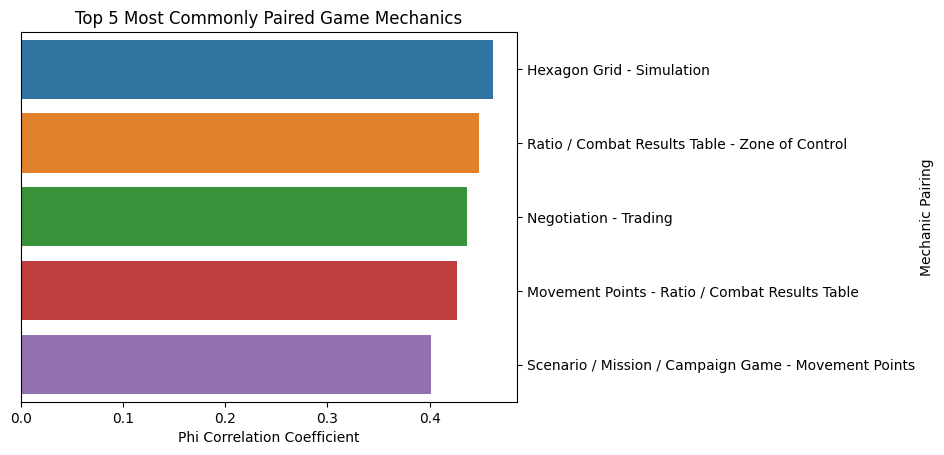

In [ ]:
#bar chart of the phi coefficients for the top 5 most commonly paired game mechanics
sns.barplot(
  data= mechanics_phi_index_df.sort_values(by= 'phi', ascending= False).head(),
  y= 'Mechanic_Pairing',
  x= 'phi',
  orient= 'h'
  )
#apply labels
plt.title('Top 5 Most Commonly Paired Game Mechanics')
plt.xlabel('Phi Correlation Coefficient')
plt.ylabel('Mechanic Pairing')
#flip y axis labels to other side
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
#show plot
plt.show()


###Do games with commonly paired mechanics tend to have better ratings than games with uncommon pairings, on average?

In order to answer this question, we want to determine what games with each mechanic pairing rating on average. Since we want each game to have an equal weight in this calculation, it is appropriate to take the average (aggregated on mechanic pairings) of the average ratings (aggregated on games). We can do similarly with the Bayesian average ratings, as well. To simplify our terminology, we will refer to a game's average rating as its "score" and its Bayesian average rating as its "Bayesian score".

First, we will start by appending two new columns to the mechanics phi index table, and filling them in, row by row, with the average scores for each game mechanic pairing.

In [ ]:
#create empty rows for averages of  score and bayesian score
mechanics_phi_index_df['AvgScore'] = None
mechanics_phi_index_df['AvgBayesScore'] = None

#determine averages of score and bayesian score for each pairing
for i in range(len(mechanics_phi_index_df.index)):
  if i != 0:
    clear_output()  #for progress indicator
  #create filter for each mechanic pair in index table
  mech1 = mechanics_phi_index_df.loc[i,'Mechanic1']
  mech2 = mechanics_phi_index_df.loc[i,'Mechanic2']
  mech_pair_filter = (mechanics_df[mech1] == 1) & (mechanics_df[mech2] == 1)
  #calculate averages of AvgRating and BayesAvgRating
  avgScore = games_df[mech_pair_filter]['AvgRating'].mean()
  avgBayesScore = games_df[mech_pair_filter]['BayesAvgRating'].mean()
  #insert averages into index table
  mechanics_phi_index_df.loc[i,'AvgScore'] = avgScore
  mechanics_phi_index_df.loc[i,'AvgBayesScore'] = avgBayesScore
  #progress indicator
  print(str(i) + '/' + str(len(mechanics_phi_index_df.index)), 'complete')

clear_output()#for progress indicator

Here, we have the mechanics phi coefficnent index table with averges for scores and Bayesian scores calculated. Worth noting are the rows where these columns are empty (NaN). No games in the data set have these pairings of game mechanics.

In [ ]:
mechanics_phi_index_df

,Mechanic1,Mechanic2,phi,Mechanic_Pairing,AvgScore,AvgBayesScore
0,Alliances,Area Majority / Influence,0.055917,Alliances - Area Majority / Influence,7.286906,6.411435
1,Alliances,Auction/Bidding,0.039997,Alliances - Auction/Bidding,7.255103,6.604823
2,Alliances,Dice Rolling,0.009871,Alliances - Dice Rolling,6.594877,5.912497
3,Alliances,Hand Management,0.003888,Alliances - Hand Management,7.344997,6.574692
4,Alliances,Simultaneous Action Selection,0.014759,Alliances - Simultaneous Action Selection,7.7873,6.968142
...,...,...,...,...,...,...
12241,Automatic Resource Growth,Dexterity,-0.006226,Automatic Resource Growth - Dexterity,NaN,NaN
12242,Automatic Resource Growth,Physical,-0.003952,Automatic Resource Growth - Physical,NaN,NaN
12243,Legacy Game,Dexterity,-0.008808,Legacy Game - Dexterity,NaN,NaN
12244,Legacy Game,Physical,0.002755,Legacy Game - Physical,6.11104,5.61615


Before we continue, me must fix the data types of our new columns which were recorded as 'objects' due to some peculiarities of our code. Shown below is the metadata for our table. Note the data type (Dtype) for the last two columns.

In [ ]:
mechanics_phi_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12246 entries, 0 to 12245
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mechanic1         12246 non-null  object 
 1   Mechanic2         12246 non-null  object 
 2   phi               12246 non-null  float64
 3   Mechanic_Pairing  12246 non-null  object 
 4   AvgScore          6134 non-null   object 
 5   AvgBayesScore     6134 non-null   object 
dtypes: float64(1), object(5)
memory usage: 574.2+ KB


This code fixes the data types for these two rows.

In [ ]:
mechanics_phi_index_df['AvgScore'] = pd.to_numeric(mechanics_phi_index_df['AvgScore'], errors='coerce')
mechanics_phi_index_df['AvgBayesScore'] = pd.to_numeric(mechanics_phi_index_df['AvgBayesScore'], errors='coerce')

In [ ]:
mechanics_phi_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12246 entries, 0 to 12245
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mechanic1         12246 non-null  object 
 1   Mechanic2         12246 non-null  object 
 2   phi               12246 non-null  float64
 3   Mechanic_Pairing  12246 non-null  object 
 4   AvgScore          6134 non-null   float64
 5   AvgBayesScore     6134 non-null   float64
dtypes: float64(3), object(3)
memory usage: 574.2+ KB


We can now plot our results for both the average ratings and Bayesian averge ratings with the code below as scatterplots with trend lines.

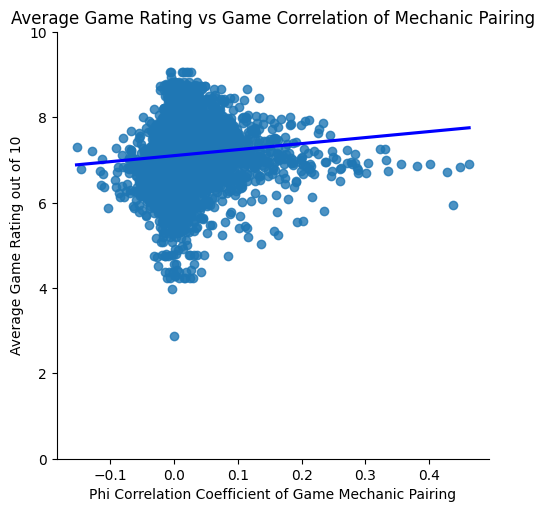

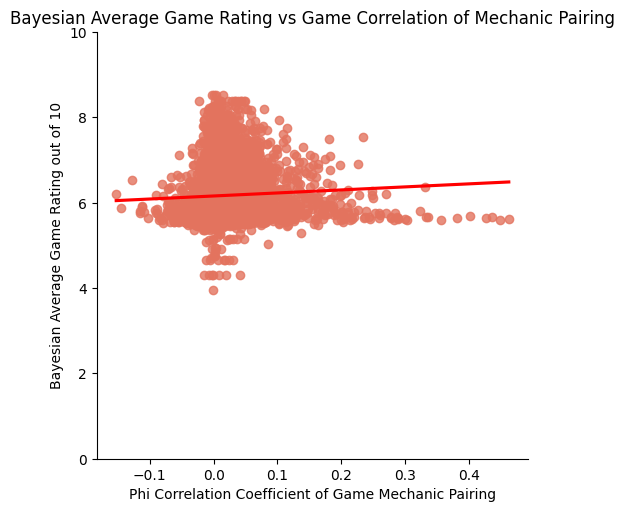

In [ ]:
#plot for AvgScore
graph = sns.lmplot(
    data= mechanics_phi_index_df,
    x= 'phi',
    y= 'AvgScore',
    line_kws={'color': 'blue'},
    ci= None
    )

graph_axes = graph.axes[0,0]
graph_axes.set_ylim(0,10)

plt.title('Average Game Rating vs Game Correlation of Mechanic Pairing')
plt.ylabel('Average Game Rating out of 10')
plt.xlabel('Phi Correlation Coefficient of Game Mechanic Pairing')

plt.show()

#spacer
print()
print()

#plot for AvgBayesScore
graph = sns.lmplot(
    data= mechanics_phi_index_df,
    x= 'phi',
    y= 'AvgBayesScore',
    scatter_kws={'color': '#E3735E'},
    line_kws={'color': 'red'},
    ci= None)

graph_axes = graph.axes[0,0]
graph_axes.set_ylim(0,10)

plt.title('Bayesian Average Game Rating vs Game Correlation of Mechanic Pairing')
plt.ylabel('Bayesian Average Game Rating out of 10')
plt.xlabel('Phi Correlation Coefficient of Game Mechanic Pairing')

plt.show()

From our scatterplots and trendlines above, we see there is a slight upward trend in the rating of a game with increased game mechanic correlation, but the correlation between the score and the phi coefficient seems weak, at best. In plain terms, while it does appear as though games with more common game mechanic pairings score higher, on average, it does not seem to be statistically significant.

If we check the correlation constant between scores and phi coefficients, as displayed below, we can clearly see that it is very weak—less than 0.09.

In [ ]:
mechanics_phi_index_df.corr()

<ipython-input-36-04dad1e68826>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mechanics_phi_index_df.corr()


,phi,AvgScore,AvgBayesScore
phi,1.000000,0.089088,0.050034
AvgScore,0.089088,1.000000,0.633839
AvgBayesScore,0.050034,0.633839,1.000000


Therefore, the answer to whether games with more commonly paired mechanics generally have higher ratings than games with less commonly paired mechanics is that **there is little correlation between game mechanics being commonly paired and game rating**. When looking for variables that affect game rating, we can conclude that the commonality of game mechanic pairings is not a significant contributor.

Interestingly the spread in both plots suggests that games with mechanic pairings that often go together *and* games with mechanic pairings that often *do not* go together tend to have more consistent scores while games with mechanic pairing that neither go together nor not go together have a broader distribution of scores. This may warrant further investigation in future analyses.

Before moving on, we will export our game mechanic phi index dataframe for use in other programs. The code below accomplishes this.

In [ ]:
mechanics_phi_index_df.to_csv('mechanic_pairings_phi_correlations.csv')

###Which mechanics have the highest and lowest ratings associated with them, on average?

For this question, we must determine the average ratings of games using each mechanic. We accomplish this with the following code. We can see that, **by average rating, the highest rated mechanic is Delayed Purchase** (a game mechanic where items purchased in the game enter play some time after the turn they were purchased) **and the lowest is Roll/Spin and Move** (where you move the number of spaces rolled/spun).

In [ ]:
#create mechanic-rating table
mechanic_rating_df = pd.DataFrame(mechanics_bool_df.columns, columns = ['Mechanic'])
mechanic_rating_df['AssociatedAvgRating'] = 0
mechanic_rating_df['AssociatedBayesAvgRating'] = 0

#create column for average associated rating
for i in range(len(mechanics_bool_df.columns)):
  #create filter for mechanic
  mech_filter = mechanics_bool_df[mechanics_bool_df.columns[i]] == 1
  mechanic_rating_df.loc[i,'AssociatedAvgRating'] = games_df[mech_filter]['AvgRating'].mean()
  mechanic_rating_df.loc[i,'AssociatedBayesAvgRating'] = games_df[mech_filter]['BayesAvgRating'].mean()

mechanic_rating_df.sort_values(by= 'AssociatedAvgRating', ascending= False)

,Mechanic,AssociatedAvgRating,AssociatedBayesAvgRating
135,Delayed Purchase,7.727606,6.714683
146,Order Counters,7.636846,6.427244
65,Tech Trees / Tech Tracks,7.614025,6.676247
60,Increase Value of Unchosen Resources,7.586792,6.745400
151,Force Commitment,7.554484,6.694212
...,...,...,...
36,Lose a Turn,6.042802,5.832728
141,Physical Removal,6.024798,5.668839
155,Dexterity,5.980817,5.587276
138,Single Loser Game,5.942862,5.708827


If we sort **by Bayesian average rating** (displayed below), instead, we find that **the top spot has been taken by Automatic Resource Growth** (a mechanic where by resources increase automatically as triggered by a game state as opposed to a randomized trigger like a die roll) **while Roll/Spin and Move remains the in the lowest spot**.

In [ ]:
mechanic_rating_df.sort_values(by= 'AssociatedBayesAvgRating', ascending= False)

,Mechanic,AssociatedAvgRating,AssociatedBayesAvgRating
153,Automatic Resource Growth,7.454126,6.854837
121,Advantage Token,7.495774,6.798018
60,Increase Value of Unchosen Resources,7.586792,6.745400
135,Delayed Purchase,7.727606,6.714683
151,Force Commitment,7.554484,6.694212
...,...,...,...
91,Zone of Control,6.950543,5.599653
19,Pattern Recognition,6.081153,5.597570
155,Dexterity,5.980817,5.587276
139,Matching,6.227832,5.556373


Below, this code displays bar charts for both of these metrics, showing the top and bottom 5 mechanics for each.

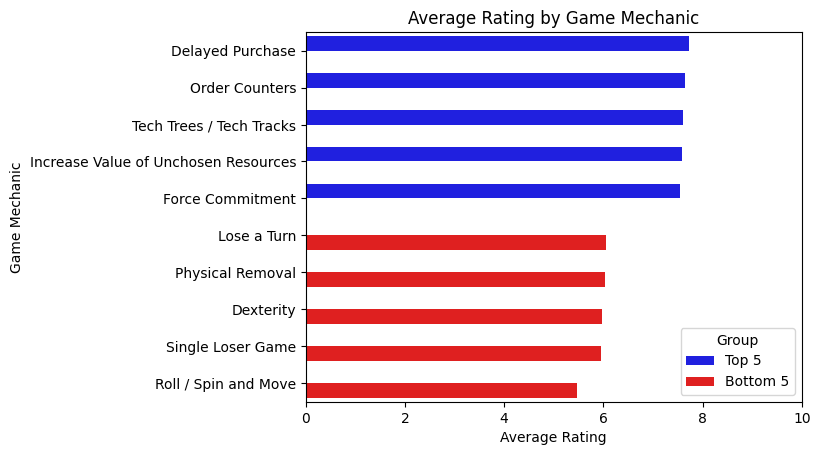

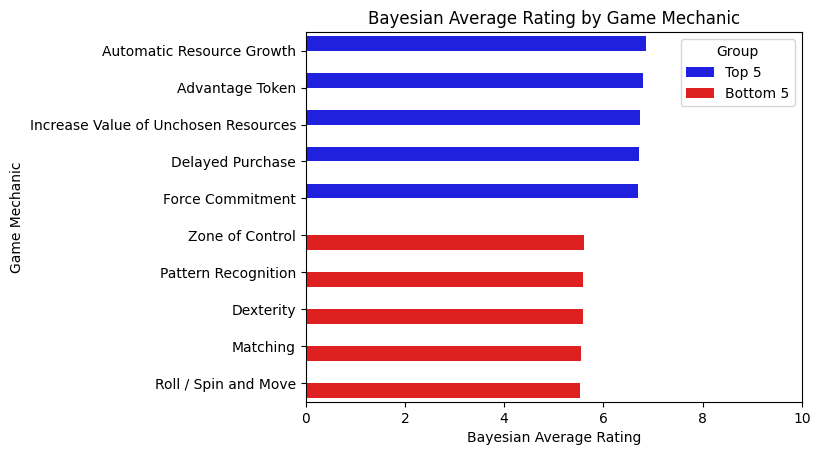

In [ ]:
#extract top and bottom 5 rows
top_5 = mechanic_rating_df.sort_values(by= 'AssociatedAvgRating', ascending= False).head()
bottom_5 = mechanic_rating_df.sort_values(by= 'AssociatedAvgRating', ascending= False).tail()
#give each group a label
top_5['Group'] = 'Top 5'
bottom_5['Group'] = 'Bottom 5'
#combine the groups
top_and_bottom_5 = pd.concat([top_5, bottom_5])

#plot both groups
mech_rating_plot = sns.barplot(data= top_and_bottom_5, y= 'Mechanic', x= 'AssociatedAvgRating', hue= 'Group', palette= {'Top 5': 'blue', 'Bottom 5': 'red'})
mech_rating_plot.set_xlim(0,10) #fix axis range
#label plot
plt.title('Average Rating by Game Mechanic')
plt.ylabel('Game Mechanic')
plt.xlabel('Average Rating')

plt.show()

#spacer
print()
print()

#extract top and bottom 5 rows
top_5_Bayes = mechanic_rating_df.sort_values(by= 'AssociatedBayesAvgRating', ascending= False).head()
bottom_5_Bayes = mechanic_rating_df.sort_values(by= 'AssociatedBayesAvgRating', ascending= False).tail()
#give each group a label
top_5_Bayes['Group'] = 'Top 5'
bottom_5_Bayes['Group'] = 'Bottom 5'
#combine the groups
top_and_bottom_5_Bayes = pd.concat([top_5_Bayes, bottom_5_Bayes])

#plot both groups
mech_rating_plot = sns.barplot(data= top_and_bottom_5_Bayes, y= 'Mechanic', x= 'AssociatedBayesAvgRating', hue= 'Group', palette= {'Top 5': 'blue', 'Bottom 5': 'red'})
mech_rating_plot.set_xlim(0,10) #fix axis range
#label plot
plt.title('Bayesian Average Rating by Game Mechanic')
plt.ylabel('Game Mechanic')
plt.xlabel('Bayesian Average Rating')

plt.show()

We can, therefore, recommend Delayed Purchase and Automatic Resource Growth as popular game mechanics to consider when designing future board games. Roll/Spin and Move, however, should be avoided.

As an aside and noting these top and bottom spots, we may notice that the top spots are taken by mechanics that are primarily deterministic in nature while the agreed-upon bottom spot is based on randomization. Some additional investigation into this may be warranted in another analysis.

###Which themes have the highest and lowest average ratings?

This question can be dealt with similarly as above. We can use the same code, slightly altered here, to give us our answer.

In [ ]:
themes_bool_df = themes_df.copy().drop(columns=['BGGId'])

#create theme-rating table
theme_rating_df = pd.DataFrame(themes_bool_df.columns, columns = ['Theme'])
theme_rating_df['AssociatedAvgRating'] = 0
theme_rating_df['AssociatedBayesAvgRating'] = 0

#create column for average associated rating
for i in range(len(themes_bool_df.columns)):
  #create filter for theme
  theme_filter = themes_bool_df[themes_bool_df.columns[i]] == 1
  theme_rating_df.loc[i,'AssociatedAvgRating'] = games_df[theme_filter]['AvgRating'].mean()
  theme_rating_df.loc[i,'AssociatedBayesAvgRating'] = games_df[theme_filter]['BayesAvgRating'].mean()

From here, we can jump straight to the plots, as shown by the code below, giving us, **by average rating and Bayesian average rating respectively, as our top spots: African Americans and Automotive Industry**. **In the bottom spots we have Memes and Super Mario Bros., respectively**.

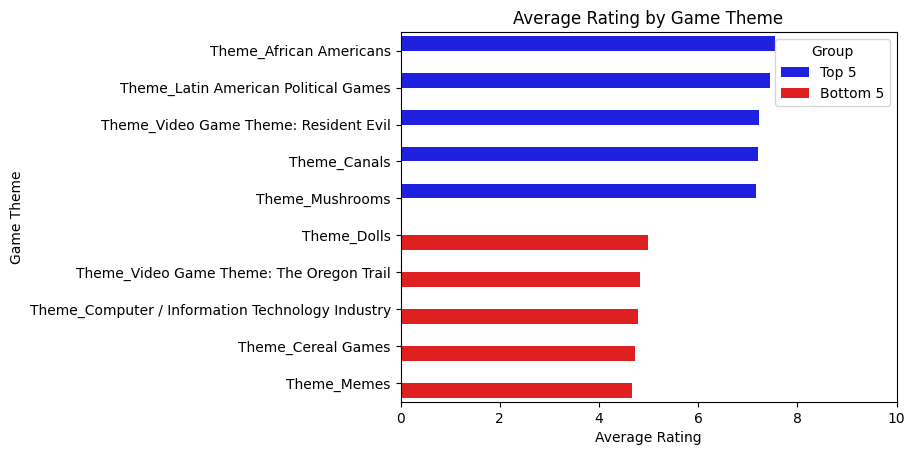

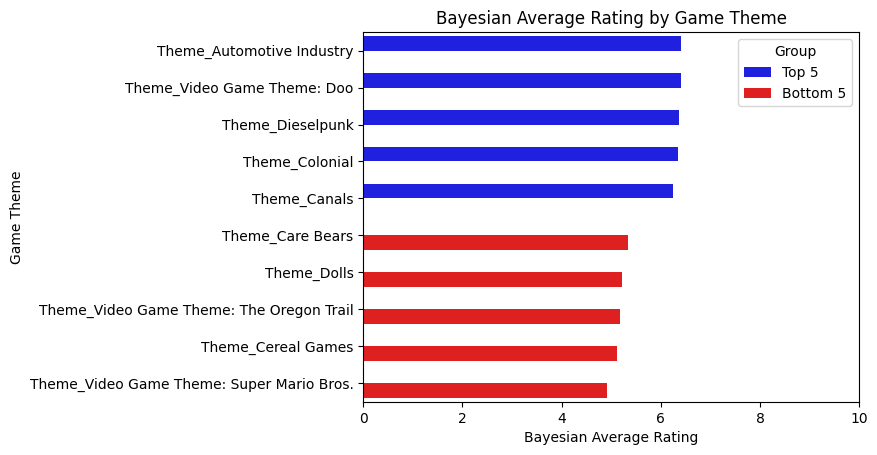

In [ ]:
#extract top and bottom 5 rows
top_5 = theme_rating_df.sort_values(by= 'AssociatedAvgRating', ascending= False).head()
bottom_5 = theme_rating_df.sort_values(by= 'AssociatedAvgRating', ascending= False).tail()
#give each group a label
top_5['Group'] = 'Top 5'
bottom_5['Group'] = 'Bottom 5'
#combine the groups
top_and_bottom_5 = pd.concat([top_5, bottom_5])

#plot both groups
theme_rating_plot = sns.barplot(data= top_and_bottom_5, y= 'Theme', x= 'AssociatedAvgRating', hue= 'Group', palette= {'Top 5': 'blue', 'Bottom 5': 'red'})
theme_rating_plot.set_xlim(0,10) #fix axis range
#label plot
plt.title('Average Rating by Game Theme')
plt.ylabel('Game Theme')
plt.xlabel('Average Rating')

plt.show()

#spacer
print()
print()

#extract top and bottom 5 rows
top_5_Bayes = theme_rating_df.sort_values(by= 'AssociatedBayesAvgRating', ascending= False).head()
bottom_5_Bayes = theme_rating_df.sort_values(by= 'AssociatedBayesAvgRating', ascending= False).tail()
#give each group a label
top_5_Bayes['Group'] = 'Top 5'
bottom_5_Bayes['Group'] = 'Bottom 5'
#combine the groups
top_and_bottom_5_Bayes = pd.concat([top_5_Bayes, bottom_5_Bayes])

#plot both groups
theme_rating_plot = sns.barplot(data= top_and_bottom_5_Bayes, y= 'Theme', x= 'AssociatedBayesAvgRating', hue= 'Group', palette= {'Top 5': 'blue', 'Bottom 5': 'red'})
theme_rating_plot.set_xlim(0,10) #fix axis range
#label plot
plt.title('Bayesian Average Rating by Game Theme')
plt.ylabel('Game Theme')
plt.xlabel('Bayesian Average Rating')

plt.show()

Considering these results, we can recommend African Americans and the Automotive Industry as popular themes to consider when designing future board games while Memes and Super Mario Bros. are not.

The reasons for these theme preferences are unclear and would require more reasearch and information to discern. An initial hypothesis is that the average rating is more susceptible to current events while the Bayesian average rating maintains a more stable depiction of theme preferences overall. One method of testing this hypothesis is seeing how the ratings associated with these themes has changes over the years and examining how this may or may not coinside with current events.

###How do player count, play time, and rating relate to eachother?

####A second data cleaning pass

This question is really three questions: "How do player count and play time relate?", "How do play time and game rating relate?", and "How do game rating and player count relate?". We will explore each of these in the order stated, but first, let's take a look at the columns involved. One of the first things we may notice is that the community maximum playtime, `ComMaxPlaytime`, seems to be identical to the manufacturer's stated play time, `MfgPlaytime`.

In [ ]:
games_df[[
    'MaxPlayers',
    'MinPlayers',
    'AvgRating',
    'BayesAvgRating',
    'MfgPlaytime',
    'ComMinPlaytime',
    'ComMaxPlaytime'
    ]].head()

,MaxPlayers,MinPlayers,AvgRating,BayesAvgRating,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime
0,5.0,3.0,7.61428,7.10363,240,240,240
1,4.0,3.0,6.64537,5.78447,30,30,30
2,4.0,2.0,7.45601,7.23994,60,30,60
3,4.0,2.0,6.60006,5.67954,60,60,60
4,6.0,2.0,7.33861,7.14189,90,90,90


We can test this hypothesis with the following code that adds up the number of times where the two columns *are not equal*.

In [ ]:
(games_df['MfgPlaytime'] != games_df['ComMaxPlaytime']).sum()

0

Evidently, the two columns are identical so we will not need to consider the maufacturer's stated play time any further in this analysis.

Now, let's look at the how closely the community minimum play time follows the maximum. This code calculates difference between the max and min play times as a percentage of the maximum.

In [ ]:
((games_df['ComMaxPlaytime'] - games_df['ComMinPlaytime']) / games_df['ComMaxPlaytime']).sort_values()

15555   -inf
17235   -inf
15533   -inf
16555   -inf
16529   -inf
        ... 
21831    NaN
21832    NaN
21843    NaN
21871    NaN
21915    NaN
Length: 21925, dtype: float64

It seems that there may be some unexpected zeros in the data which we missed in our first sweep of data cleaning. Let's look at just how many zeros there are in these columns with the following code:

In [ ]:
#create filter for playtimes of 0
zeroPlaytime_filter = (games_df['ComMinPlaytime'] == 0) | (games_df['ComMaxPlaytime'] == 0)

#display records for playtimes of 0
games_df[zeroPlaytime_filter][['ComMinPlaytime','ComMaxPlaytime']]

,ComMinPlaytime,ComMaxPlaytime
20,0,0
50,0,0
211,0,0
525,0,0
611,0,0
...,...,...
21870,15,0
21871,0,0
21880,15,0
21909,15,0


We find there to be almost 800 of these cases. We also can see in the last few rows that there are cases where the minumum is greater than the maximum—clearly a logical error and mis-input.

For the purposes of this analysis, if a game has a specified playtime of zero in *either* of these columns, we can assume there was some error in the record. We will, therefore, impute the missing values as follows: for records with only one zero, we will assume the maximum and minimum play times are the same; for the records for which both columns are zero, we will replace the zeros with null values (as we did for zero players).

We accomplish this with the following bits of code.

In [ ]:
#for one zero value, assume max and min are the same
games_df.loc[games_df['ComMinPlaytime'] == 0, 'ComMinPlaytime'] = games_df['ComMaxPlaytime']
games_df.loc[games_df['ComMaxPlaytime'] == 0, 'ComMaxPlaytime'] = games_df['ComMinPlaytime']
#for two missing values, replace 0s with null values, reaffirm data type as numeric
games_df['ComMinPlaytime'].replace(0, None, inplace= True)
games_df['ComMinPlaytime'] = pd.to_numeric(games_df['ComMinPlaytime'], errors='coerce')
games_df['ComMaxPlaytime'].replace(0, None, inplace= True)
games_df['ComMaxPlaytime'] = pd.to_numeric(games_df['ComMaxPlaytime'], errors='coerce')

Let's let's look again at the how closely the community minimum play time follows the maximum. Once again, this code calculates difference between the max and min play times as a percentage of the maximum.

In [ ]:
((games_df['ComMaxPlaytime'] - games_df['ComMinPlaytime']) / games_df['ComMaxPlaytime']).sort_values()

12764   -19.000000
10609    -0.666667
12327    -0.500000
1235     -0.500000
10661     0.000000
           ...    
21831          NaN
21832          NaN
21843          NaN
21871          NaN
21915          NaN
Length: 21925, dtype: float64

As can be seen above, we are getting some negative values. This could only be the case if some of our maximum play times wer less than their minimum counterparts.

The code below identifies these records.

In [ ]:
MaxLessThanMin_playtime_filter = games_df['ComMaxPlaytime'] < games_df['ComMinPlaytime']
games_df[MaxLessThanMin_playtime_filter][['BGGId',
                                          'Name',
                                          'YearPublished',
                                          'ComMinPlaytime',
                                          'ComMaxPlaytime'
                                          ]]

,BGGId,Name,YearPublished,ComMinPlaytime,ComMaxPlaytime
1235,1654,Double Crossing,1988,90.0,60.0
10609,94837,Scotland Yard: Hunting Mister X,2011,25.0,15.0
12327,140279,Clacks: A Discworld Board Game,2015,45.0,30.0
12764,147149,A Game For Good Christians,2013,20.0,1.0


As there are only four such records, it becomes feasible to investigate each game individually. This investigation into each game reveals that it is likely that the maximum and minimum play times were accidentally swapped on input into the data base. So, for the purposes of this analysis, we will impute the data by simply swapping the values for these four entries.

The code below swaps all playtime values where the minimum exceeds the maximum.

In [ ]:
#make a copy of the existing playtimes
temp_playtime_df = games_df[['ComMinPlaytime','ComMaxPlaytime']].copy()
#swap max and min for offending rows
games_df.loc[MaxLessThanMin_playtime_filter, 'ComMinPlaytime'] = temp_playtime_df['ComMaxPlaytime']
games_df.loc[MaxLessThanMin_playtime_filter, 'ComMaxPlaytime'] = temp_playtime_df['ComMinPlaytime']

Finally, we check the difference expressed as a percentage of the maximum one last time:

In [ ]:
((games_df['ComMaxPlaytime'] - games_df['ComMinPlaytime']) / games_df['ComMaxPlaytime']).sort_values()

0        0.0
10631    0.0
10632    0.0
10634    0.0
10635    0.0
        ... 
21831    NaN
21832    NaN
21843    NaN
21871    NaN
21915    NaN
Length: 21925, dtype: float64

There are no longer any negative values so we can now determine the descriptive statistics for percent difference between the maximum and minimum play times for the whole set with the code below. This code creates a new column for the percent difference in play time in the games table, `games_df`, and calculates the descriptive statistics for that column.

In [ ]:
#cast percent difference to numeric data type
playtime_percent_difference = ((games_df['ComMaxPlaytime'] - games_df['ComMinPlaytime']) / games_df['ComMaxPlaytime'])
games_df['playtime_percent_difference'] = pd.to_numeric(playtime_percent_difference, errors='coerce')

#compute descriptive statistics for playtime percent difference column
games_df.describe()['playtime_percent_difference']


count    21292.000000
mean         0.156596
std          0.244545
min          0.000000
25%          0.000000
50%          0.000000
75%          0.333333
max          0.999000
Name: playtime_percent_difference, dtype: float64

Considering this and the histogram of the distribution of percent differences below, for the purposes of this analysis, it is reasonable to consider the maximum play time as *the* play time. For the remainder of the analysis, we will consider ony the maximum play time when answering our questions.

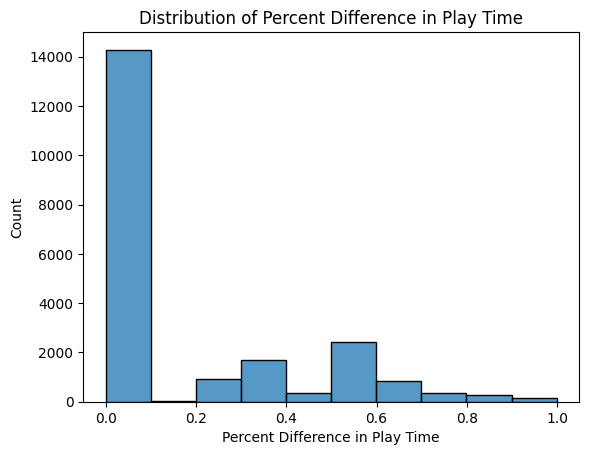

In [ ]:
sns.histplot(data= games_df, x= games_df['playtime_percent_difference'], bins= 10)
plt.title("Distribution of Percent Difference in Play Time")
plt.xlabel("Percent Difference in Play Time")
plt.show()

Before moving onto the questions in this section, let's look at the descriptive statistics for all the columns involved incase there are more cases of dirty data we missed in the first pass. Here are the descriptive statistics for these columns displayed below by the following code:

In [ ]:
games_df[[
    'MaxPlayers',
    'MinPlayers',
    'AvgRating',
    'BayesAvgRating',
    'ComMaxPlaytime'
    ]].describe()

,MaxPlayers,MinPlayers,AvgRating,BayesAvgRating,ComMaxPlaytime
count,21885.000000,21885.000000,21925.000000,21925.000000,21292.000000
mean,5.732282,2.012154,6.424922,5.685673,93.458764
std,15.022329,0.687472,0.932477,0.365311,537.221287
min,1.000000,1.000000,1.041330,3.574810,1.000000
25%,4.000000,2.000000,5.836960,5.510300,30.000000
50%,4.000000,2.000000,6.453950,5.546540,45.000000
75%,6.000000,2.000000,7.052450,5.679890,90.000000
max,999.000000,10.000000,9.914290,8.514880,60000.000000


60,000 minutes seems like quite a long game and might be an error. Let's look into this game using the information available to us in the games table, displayed below.

In [ ]:

id_and_involved_columns = ['BGGId',
                           'Name',
                           'YearPublished',
                           'MaxPlayers',
                           'MinPlayers',
                           'AvgRating',
                           'BayesAvgRating',
                           'ComMaxPlaytime'
                           ]

games_df.loc[games_df['ComMaxPlaytime'] == 60000, id_and_involved_columns]

,BGGId,Name,YearPublished,MaxPlayers,MinPlayers,AvgRating,BayesAvgRating,ComMaxPlaytime
3025,4815,The Campaign for North Africa: The Desert War ...,1979,10.0,8.0,6.1663,5.52495,60000.0


With a little research, this game's playtime legitimately proves to be on the order of one thousand hours, even extending to 1,200 hours for some player counts.² Clearly, our 1,000 stated max play time does not quite agree we will leave it intact as we are concerning ourselves with what the community deemed to be the max play time, not the author of the description.

    ² BoardGameGeek. Campaign for North Africa: The Desert War 1940-43 (1979) - BoardGameGeek. BoardGameGeek. https://boardgamegeek.com/boardgame/4815/campaign-north-africa-desert-war-1940-43

####How do player count and play time relate?

Having cleaned and confirmed the validity of our play time data, we can now begin answering this section's questions.  First, let's take a look at the barplots of the average play time aggregated on the maximum and minumum player counts.

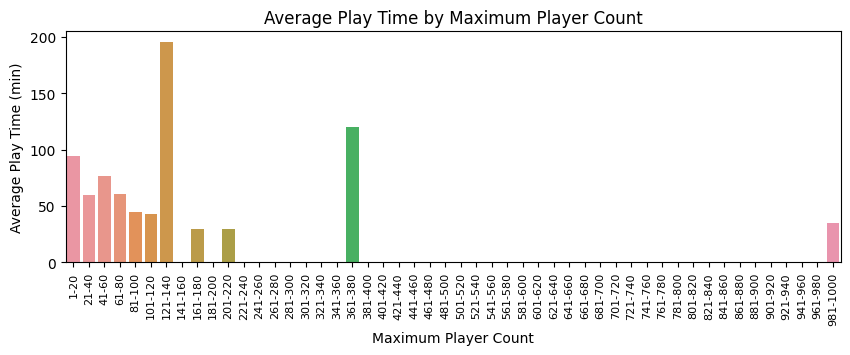

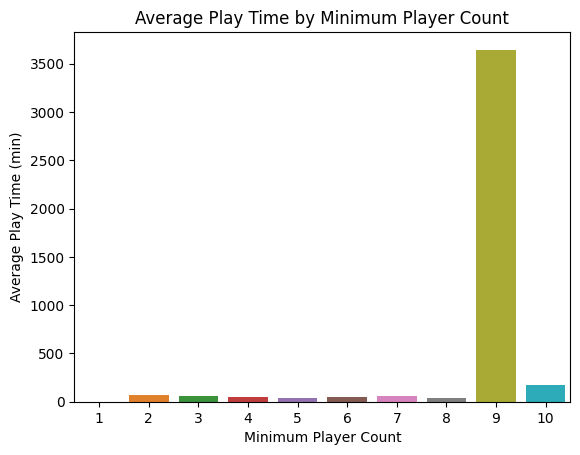

In [ ]:
#PLOT Average Play Time by Maximum Player Count

#prepare histogram dimensions
binSize = 20
endOfBins = int(np.ceil(games_df['MaxPlayers'].max() / binSize) * binSize)

#create new column containing PlayerCountGroups of binSize
games_df['MaxPlayerCountGroup'] = (games_df['MaxPlayers'] // binSize * binSize + binSize).astype('Int64')
#create new df aggregating on player count group
playTimeByMaxPlayers_index_df = games_df[['MaxPlayerCountGroup','ComMaxPlaytime']].groupby('MaxPlayerCountGroup').agg('mean')

#create new df containing all bins up to 1000 (to make histogram with no holes)
maxPlayers_games_histBins_df = pd.DataFrame({'MaxPlayersBin': list(range(binSize, endOfBins + 1, binSize))})
#fill in average play times in to associated MaxPlayers bins
maxPlayers_games_histBins_df['AvgPlayTime'] = None #initialize all average playtimes to null
for playerCount in playTimeByMaxPlayers_index_df.index:
  maxPlayers_games_histBins_df.loc[maxPlayers_games_histBins_df['MaxPlayersBin'] == playerCount, 'AvgPlayTime'] = playTimeByMaxPlayers_index_df.loc[playerCount, 'ComMaxPlaytime']
#recast to integers
maxPlayers_games_histBins_df['AvgPlayTime'] = pd.to_numeric(maxPlayers_games_histBins_df['AvgPlayTime'], errors='coerce')

#create histogram labels for bins
lowerBound = (maxPlayers_games_histBins_df['MaxPlayersBin'] - binSize + 1).astype('Int64').astype('string')
upperBound = (maxPlayers_games_histBins_df['MaxPlayersBin']).astype('Int64').astype('string')
maxPlayers_games_histBins_df['MaxPlayersBin_label'] = lowerBound + '-' + upperBound

#plot histogram
plotWidth = int(np.ceil(0.2 * endOfBins / binSize))
plt.figure(figsize=(plotWidth,3))
sns.barplot(data= maxPlayers_games_histBins_df, x= 'MaxPlayersBin_label', y= 'AvgPlayTime')
plt.title('Average Play Time by Maximum Player Count')
plt.ylabel('Average Play Time (min)')
plt.xlabel('Maximum Player Count')

#rotate labels for legibility
plt.xticks(rotation= 90, fontsize= 8)
plt.show()

#-------------------------------------------------------------------------------
#spacer
print()
print()
#-------------------------------------------------------------------------------

#PLOT Average Play Time by Minimum Player Count

#prepare histogram dimensions
binSize = 1
endOfBins = int(np.ceil(games_df['MinPlayers'].max() / binSize) * binSize)

#create new column containing PlayerCountGroups of binSize
games_df['MinPlayerCountGroup'] = (games_df['MinPlayers'] // binSize * binSize + binSize).astype('Int64')
#create new df aggregating on player count group
playTimeByMinPlayers_index_df = games_df[['MinPlayerCountGroup','ComMinPlaytime']].groupby('MinPlayerCountGroup').agg('mean')


#create new df containing all bins up to 1000 (to make barchart with no holes)
minPlayers_games_histBins_df = pd.DataFrame({'MinPlayersBin': list(range(binSize, endOfBins + 1, binSize))})
#fill in average play times in to associated MinPlayers bins
minPlayers_games_histBins_df['AvgPlayTime'] = None #initialize all average playtimes to null
for playerCount in playTimeByMinPlayers_index_df.index:
  minPlayers_games_histBins_df.loc[minPlayers_games_histBins_df['MinPlayersBin'] == playerCount, 'AvgPlayTime'] = playTimeByMinPlayers_index_df.loc[playerCount, 'ComMinPlaytime']
#recast to integers
minPlayers_games_histBins_df['AvgPlayTime'] = pd.to_numeric(minPlayers_games_histBins_df['AvgPlayTime'], errors='coerce')


#plot barchart
# plotWidth = int(np.ceil(0.2 * endOfBins / binSize))
# plt.figure(figsize=(plotWidth,3))
sns.barplot(data= minPlayers_games_histBins_df, x= 'MinPlayersBin', y= 'AvgPlayTime')
plt.title('Average Play Time by Minimum Player Count')
plt.ylabel('Average Play Time (min)')
plt.xlabel('Minimum Player Count')

plt.show()


Looking at these bar charts, it is difficult to see patterns outside of some unexpected spikes at various player counts. It is recommended that these spikes be further investigated in a separate analysis. For now, we are concerned with how player count and play time relate *overall*. So, we will instead look at scatterplots, complete with trend lines, for the data to see if we can spot a trend. This code plots the play time versus the maximum and minimum player counts repectively.

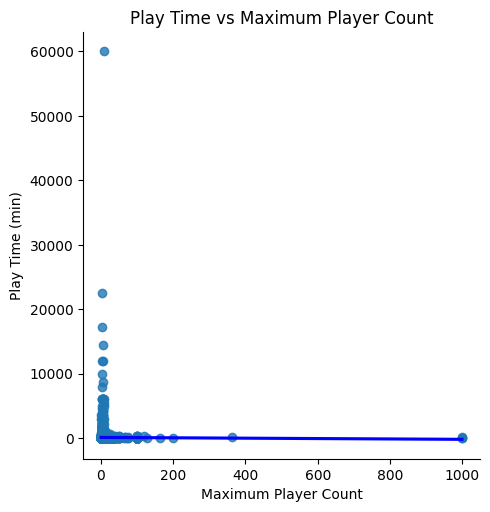

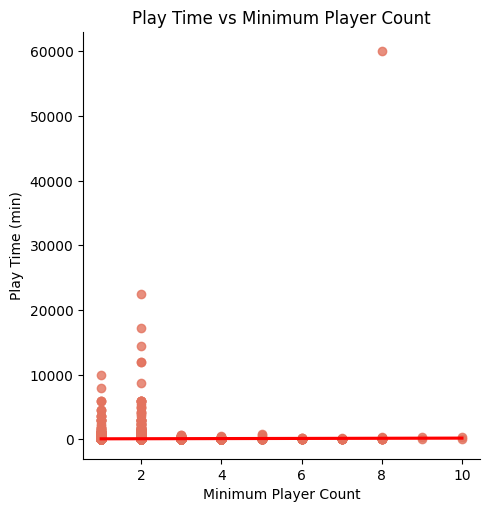

In [ ]:
#scatterplot for Play Time vs Maximum Player Count
sns.lmplot(data= games_df, x= 'MaxPlayers', y= 'ComMaxPlaytime', line_kws={"color": "blue"}, ci= None)
plt.title('Play Time vs Maximum Player Count')
plt.xlabel('Maximum Player Count')
plt.ylabel('Play Time (min)')
plt.show()

#spacer
print()
print()

#scatterplot for Play Time vs Minimum Player Count
sns.lmplot(data= games_df, x= 'MinPlayers', y= 'ComMaxPlaytime', line_kws={"color": "red"}, scatter_kws={'color': '#E3735E'}, ci= None)
plt.title('Play Time vs Minimum Player Count')
plt.xlabel('Minimum Player Count')
plt.ylabel('Play Time (min)')
plt.show()

Loooking at both of these plots, there appears to be a very flat trendline across both categories. This may be due to the scale of the y axis on these plots.  If we exclude the outliers, say by use of inter quartile range (IQR), we may be able to see a clearer trend.  The code below calculates the IQR for play time and plots the same scatterplots with outliers filtered out (as determined by the 1.5 times the IQR rule).

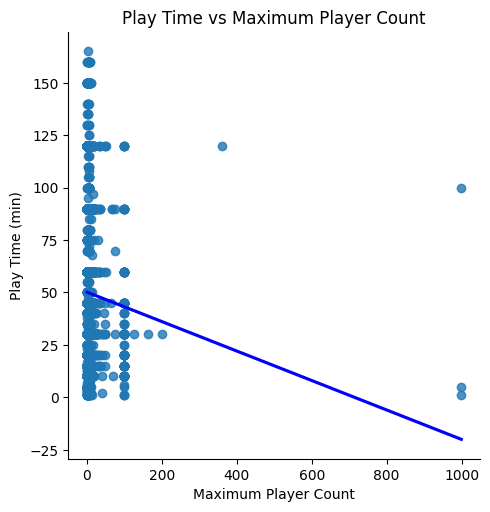

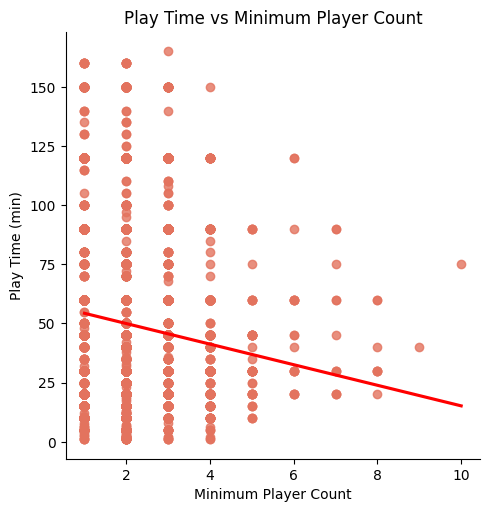

In [ ]:
#calculate quartiles
max_quartile3 = games_df['ComMaxPlaytime'].quantile(.75)
max_quartile1 = games_df['ComMaxPlaytime'].quantile(.25)
#calculate IQR
max_IQR = max_quartile3 - max_quartile1

#create upper bound for 1.5 * IQR filter
max_IQR_1point5_upperBound = games_df['ComMaxPlaytime'] < max_quartile3 + max_IQR * 1.5
#create lower bound for 1.5 * IQR filter
max_IQR_1point5_lowerBound = games_df['ComMaxPlaytime'] > max_quartile1 - max_IQR * 1.5
#create 1.5 * IQR filter
max_IQR_1point5_filter = max_IQR_1point5_lowerBound & max_IQR_1point5_upperBound

#scatterplot for Play Time vs Maximum Player Count
sns.lmplot(data= games_df[max_IQR_1point5_filter], x= 'MaxPlayers', y= 'ComMaxPlaytime', line_kws={"color": "blue"}, ci= None)
plt.title('Play Time vs Maximum Player Count')
plt.xlabel('Maximum Player Count')
plt.ylabel('Play Time (min)')
plt.show()

#spacer
print()
print()

#scatterplot for Play Time vs Minimum Player Count
sns.lmplot(data= games_df[max_IQR_1point5_filter], x= 'MinPlayers', y= 'ComMaxPlaytime', line_kws={"color": "red"}, scatter_kws={'color': '#E3735E'}, ci= None)
plt.title('Play Time vs Minimum Player Count')
plt.xlabel('Minimum Player Count')
plt.ylabel('Play Time (min)')
plt.show()

From this we do get a more granular picture of some more reasonable play times, however, a quick look at the plot of Play Time vs Maximum Player Count shows us that a linear regression model is not a good model for the data as negative play times are nonsensical. Perhaps, in another analysis, we could caclulate an exponential regression.

In order to answer our question, however, it seems we must resort to simple correlation.  The code below shows a table of correlation coefficients for the maximim player count, minimum player count, and play time. With such low correlation constants, it is safe to say that **player count and play time are not significantly correlated**.

In [ ]:
games_df[['MaxPlayers','MinPlayers','ComMaxPlaytime']].corr()

,MaxPlayers,MinPlayers,ComMaxPlaytime
MaxPlayers,1.000000,0.082787,-0.008276
MinPlayers,0.082787,1.000000,0.014969
ComMaxPlaytime,-0.008276,0.014969,1.000000


Even when discounting outliers, as shown below, we are left with slightly higher correlations which are, nevertheless, less than significant.

In [ ]:
games_df.loc[max_IQR_1point5_filter, ['MaxPlayers','MinPlayers','ComMaxPlaytime']].corr()

,MaxPlayers,MinPlayers,ComMaxPlaytime
MaxPlayers,1.000000,0.074035,-0.033229
MinPlayers,0.074035,1.000000,-0.088501
ComMaxPlaytime,-0.033229,-0.088501,1.000000


####How do play time and game rating relate?

Moving on to the relation between play time and game rating, let us start by looking at a scatterplot between the two (using `ComMaxPlaytime` as the default play time for reasons discussed previously). Below, we have code displaying scatterplots for the average rating and the Bayesian average rating vs play time, respectively.

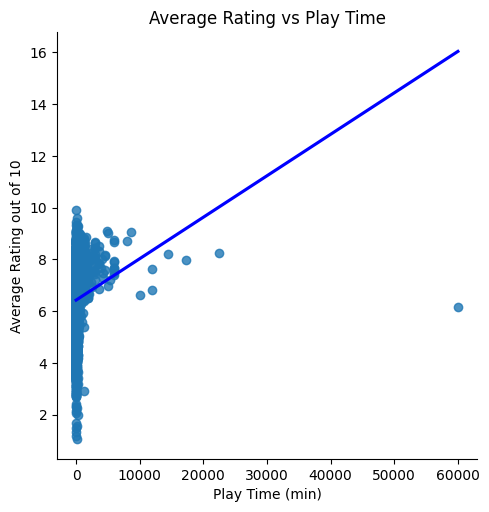

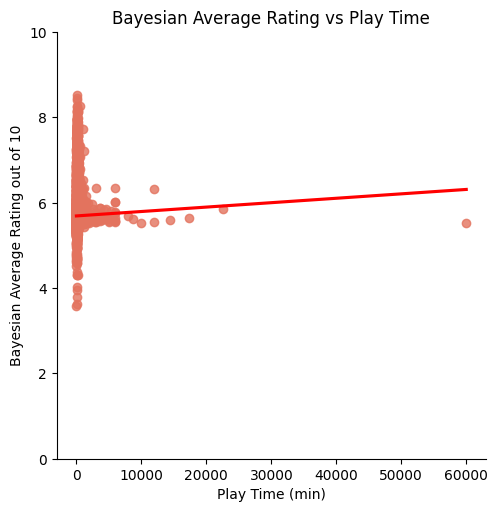

In [ ]:
#plot Average Rating vs Play Time
sns.lmplot(data= games_df, x= 'ComMaxPlaytime', y= 'AvgRating', line_kws={"color": "blue"}, ci= None)
plt.title('Average Rating vs Play Time')
plt.xlabel('Play Time (min)')
plt.ylabel('Average Rating out of 10')
plt.show()

#spacer
print()
print()

#plot Bayesian Average Rating vs Play Time
bayesAvgRateVplaytime_plot = sns.lmplot(data= games_df, x= 'ComMaxPlaytime', y= 'BayesAvgRating', scatter_kws={'color': '#E3735E'}, line_kws={"color": "red"}, ci= None)
plt.title('Bayesian Average Rating vs Play Time')
plt.xlabel('Play Time (min)')
plt.ylabel('Bayesian Average Rating out of 10')
bayesAvgRateVplaytime_plot_axes = bayesAvgRateVplaytime_plot.axes[0,0]
bayesAvgRateVplaytime_plot_axes.set_ylim(0,10)
plt.show()

We can clearly see that the trendline gives us nonsensical predictions (i.e. greater than 10) in the Average Rating vs Play Time scatterplot. However, the Bayesian Average Rating has more reasonable predictions. Game rating does seem to be positively correlated with play time. To confirm, we examine the results of the code below, which show a table of correlation coefficients for games' ratings and play times.

In [ ]:
games_df[['AvgRating','BayesAvgRating','ComMaxPlaytime']].corr()

,AvgRating,BayesAvgRating,ComMaxPlaytime
AvgRating,1.000000,0.480721,0.093422
BayesAvgRating,0.480721,1.000000,0.015048
ComMaxPlaytime,0.093422,0.015048,1.000000


Counter to our expectations and as our code shows, **while game rating is positively correlated with play time, it is not significantly so**. Using the regular average, we find a stronger correlation than with the Bayesian average but it is still extremely weak.

Nevertheless, below we have pictured the average and Bayesian average rating aggregated on play time as line charts with playtime outliers excluded for legibility.  Other than the very slight positive correlation, not much in the way of patterns is evident.

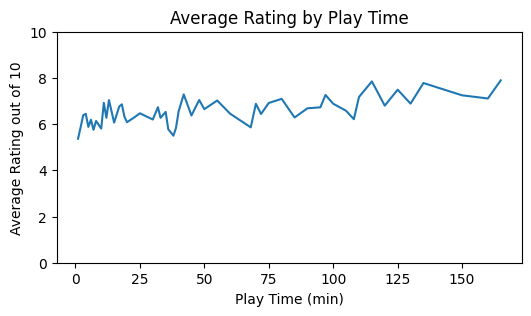

In [ ]:
plt.figure(figsize=(6,3))
AvgRatebyPlaytime_plot = sns.lineplot(data= games_df.loc[max_IQR_1point5_filter,['AvgRating','ComMaxPlaytime']].groupby('ComMaxPlaytime', as_index = False).agg('mean'), x= 'ComMaxPlaytime', y= 'AvgRating' )
plt.title('Average Rating by Play Time')
plt.xlabel('Play Time (min)')
plt.ylabel('Average Rating out of 10')
AvgRatebyPlaytime_plot_axes = AvgRatebyPlaytime_plot.axes
AvgRatebyPlaytime_plot_axes.set_ylim(0,10)
plt.show()

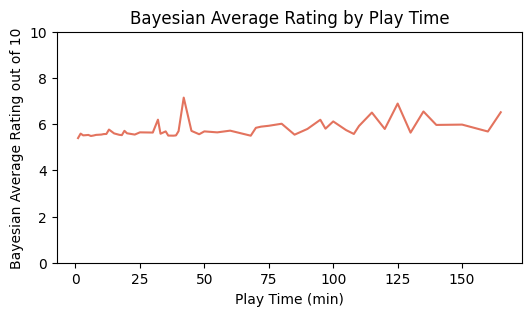

In [ ]:
plt.figure(figsize=(6,3))
BayesAvgRatebyPlaytime_plot = sns.lineplot(data= games_df.loc[max_IQR_1point5_filter,['BayesAvgRating','ComMaxPlaytime']].groupby('ComMaxPlaytime', as_index = False).agg('mean'), x= 'ComMaxPlaytime', y= 'BayesAvgRating', color = '#E3735E')
plt.title('Bayesian Average Rating by Play Time')
plt.xlabel('Play Time (min)')
plt.ylabel('Bayesian Average Rating out of 10')
BayesAvgRatebyPlaytime_plot_axes = BayesAvgRatebyPlaytime_plot.axes
BayesAvgRatebyPlaytime_plot_axes.set_ylim(0,10)
plt.show()

####How do game rating and player count relate

Having learned from previous questions, we start the process of answering this question by looking at the correlation coefficients, below. **We find very weak negative correlations between player count and game rating.** However, since this is neither interesting nor helpful information, we will examine the data in finer granularity.

In [ ]:
games_df[[
    'MaxPlayers',
    'MinPlayers',
    'AvgRating',
    'BayesAvgRating'
    ]].corr()

,MaxPlayers,MinPlayers,AvgRating,BayesAvgRating
MaxPlayers,1.000000,0.082787,-0.040904,-0.021165
MinPlayers,0.082787,1.000000,-0.172915,-0.087495
AvgRating,-0.040904,-0.172915,1.000000,0.480721
BayesAvgRating,-0.021165,-0.087495,0.480721,1.000000


Below, we have code which displays line charts of the average and Bayesian average game rating aggrgated on maximum and minimum player counts.

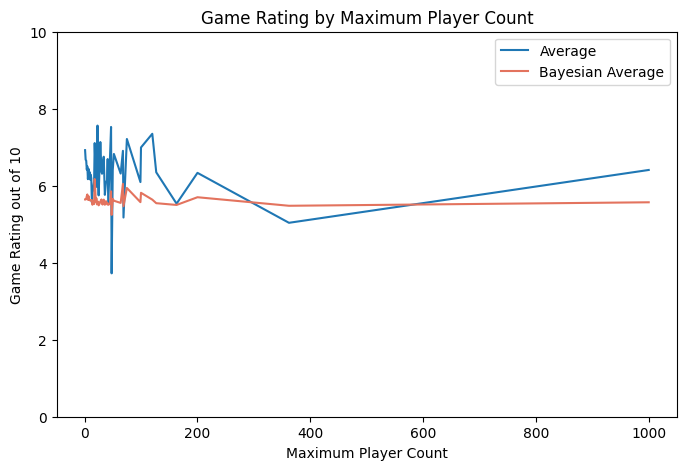

In [ ]:
plt.figure(figsize= (8,5))
maxPvR_plot = sns.lineplot(
    data=games_df[['MaxPlayers','AvgRating']].groupby('MaxPlayers', as_index= False).agg('mean'),
    x= 'MaxPlayers',
    y= 'AvgRating',
    label= 'Average'
    )
sns.lineplot(
    data=games_df[['MaxPlayers','BayesAvgRating']].groupby('MaxPlayers', as_index= False).agg('mean'),
    x= 'MaxPlayers',
    y= 'BayesAvgRating',
    label= 'Bayesian Average',
    color = '#E3735E'
    )
maxPvR_plot_axes = maxPvR_plot.axes
maxPvR_plot_axes.set_ylim(0,10)
plt.title("Game Rating by Maximum Player Count")
plt.xlabel('Maximum Player Count')
plt.ylabel('Game Rating out of 10')
plt.show()

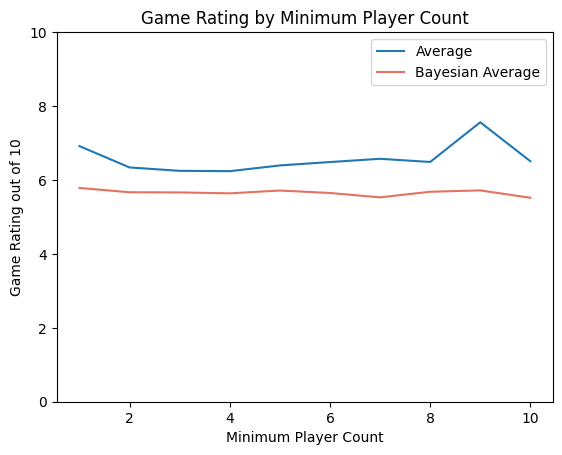

In [ ]:
# plt.figure(figsize= (8,5))
minPvR_plot = sns.lineplot(
    data=games_df[['MinPlayers','AvgRating']].groupby('MinPlayers', as_index= False).agg('mean'),
    x= 'MinPlayers',
    y= 'AvgRating',
    label= 'Average'
    )
sns.lineplot(
    data=games_df[['MinPlayers','BayesAvgRating']].groupby('MinPlayers', as_index= False).agg('mean'),
    x= 'MinPlayers',
    y= 'BayesAvgRating',
    label= 'Bayesian Average',
    color = '#E3735E'
    )
minPvR_plot_axes = minPvR_plot.axes
minPvR_plot_axes.set_ylim(0,10)
plt.title("Game Rating by Minimum Player Count")
plt.xlabel('Minimum Player Count')
plt.ylabel('Game Rating out of 10')
plt.show()

As the correlation coefficients suggested, there is little in the way of discernable paterns in these line charts.  We may conclude, therefore, that **there is little correlation between game rating and number of players**.

###Which theme-mechanic pairings have the highest average rating?

To answer this question, we use the code below to aggregate the average and Bayesian average ratings on each possible theme-mechanic pairing. The code creates a table containing the aggregated ratings for each theme-mechanic pairing. It takes a few minutes to run, much like some of the code in previous questions, so a progress indicator is provided.

In [ ]:
#create lists of themse and mechanics
theme_list = themes_df.copy().drop(columns= ['BGGId']).columns
mechanic_list = mechanics_df.copy().drop(columns= ['BGGId']).columns

#count themes and mechanics pairings for keeping track of progress in for loop later
num_themes = len(theme_list)
num_mechanics = len(mechanic_list)
num_pairings = num_themes * num_mechanics

#create a merged df with ratings, themes, and mechanics
games_rating_theme_df = pd.merge(games_df.copy()[['BGGId','AvgRating','BayesAvgRating']], themes_df.copy(), on= 'BGGId', how= 'inner')
games_rating_theme_mechanic_df = pd.merge(games_rating_theme_df.copy(), mechanics_df.copy(), on= 'BGGId', how= 'inner')
games_rating_theme_mechanic_df.drop(columns = ['BGGId'], inplace= True)

#create empty lists for pairings, average rating, and bayesian average ratings
theme_component = []
mechanic_component = []
theme_mechanic_pairing_list = []
theme_mechanic_AvgRating = []
theme_mechanic_BayesAvgRating = []

#initialize progress counter
progressCounter = 0

#initialize progress tracker
print(str(progressCounter // num_pairings * 100) + '%', 'complete')
percentIncrement = 1

#fill in theme_mechanic_df with Bayesian Average Rating aggregated on theme and mechanic
for theme in theme_list:
  for mechanic in mechanic_list:
    #create new df aggregated on theme and mechanic
    theme_mechanic_ratings_agg_df = games_rating_theme_mechanic_df[
        ['AvgRating','BayesAvgRating',theme,mechanic]
        ].copy().groupby([theme, mechanic], as_index= False).mean()
    #create paired filter
    theme_mechanic_paired_filter = (theme_mechanic_ratings_agg_df[theme] == 1) & (theme_mechanic_ratings_agg_df[mechanic] == 1)
    #extract average and Bayesian average ratings from aggregated df
    if theme_mechanic_ratings_agg_df[theme_mechanic_paired_filter].empty: #if there are no games with this pairing
      theme_mechanic_AvgRating.append(None)
      theme_mechanic_BayesAvgRating.append(None)
    else: #if there are games with this pairing
      new_avgRating = theme_mechanic_ratings_agg_df.loc[theme_mechanic_paired_filter,'AvgRating'].item()
      new_bayesAvgRating = theme_mechanic_ratings_agg_df.loc[theme_mechanic_paired_filter,'BayesAvgRating'].item()
      theme_mechanic_AvgRating.append(new_avgRating)
      theme_mechanic_BayesAvgRating.append(new_bayesAvgRating)
    #create labels
    theme_component.append(theme)
    mechanic_component.append(mechanic)
    theme_mechanic_pairing_list.append(theme + ' : ' + mechanic)

    #update progress
    progressCounter += 1
    #calculate percent complete
    percentComplete = (progressCounter // num_pairings) * 100
    clear_output()
    print(progressCounter,'of', num_pairings, 'pairings complete')
    if percentComplete in range(percentIncrement, 101, percentIncrement):
      clear_output()
      print(str(percentComplete) + '%', 'complete')

#create df from lists for pairings, average rating, and bayesian average ratings
theme_mechanic_rating_df = pd.DataFrame({
    'Theme' : theme_component,
    'Mechanic' : mechanic_component,
    'Theme:Mechanic' : theme_mechanic_pairing_list,
    'AvgRating' : theme_mechanic_AvgRating,
    'BayesAvgRating' : theme_mechanic_BayesAvgRating
    })

clear_output()
theme_mechanic_rating_df


,Theme,Mechanic,Theme:Mechanic,AvgRating,BayesAvgRating
0,Adventure,Alliances,Adventure : Alliances,5.658387,5.492950
1,Adventure,Area Majority / Influence,Adventure : Area Majority / Influence,6.789932,5.812359
2,Adventure,Auction/Bidding,Adventure : Auction/Bidding,6.422733,5.795201
3,Adventure,Dice Rolling,Adventure : Dice Rolling,6.808588,5.858839
4,Adventure,Hand Management,Adventure : Hand Management,6.799723,5.904278
...,...,...,...,...,...
34064,Theme_Flags identification,Rondel,Theme_Flags identification : Rondel,NaN,NaN
34065,Theme_Flags identification,Automatic Resource Growth,Theme_Flags identification : Automatic Resourc...,NaN,NaN
34066,Theme_Flags identification,Legacy Game,Theme_Flags identification : Legacy Game,NaN,NaN
34067,Theme_Flags identification,Dexterity,Theme_Flags identification : Dexterity,NaN,NaN


This code exports the newly created aggregated table to a csv file so we don't have to run the above code again.

In [ ]:
theme_mechanic_rating_df.to_csv('theme_mechanic_rating.csv')


Now, we can answer the question of which theme-mechanic pairs have the highest ratings on average. The code below displays bar graphs for the top 5 highest and lowest rated pairings by Average and Bayesian Average Ratings, respectively.

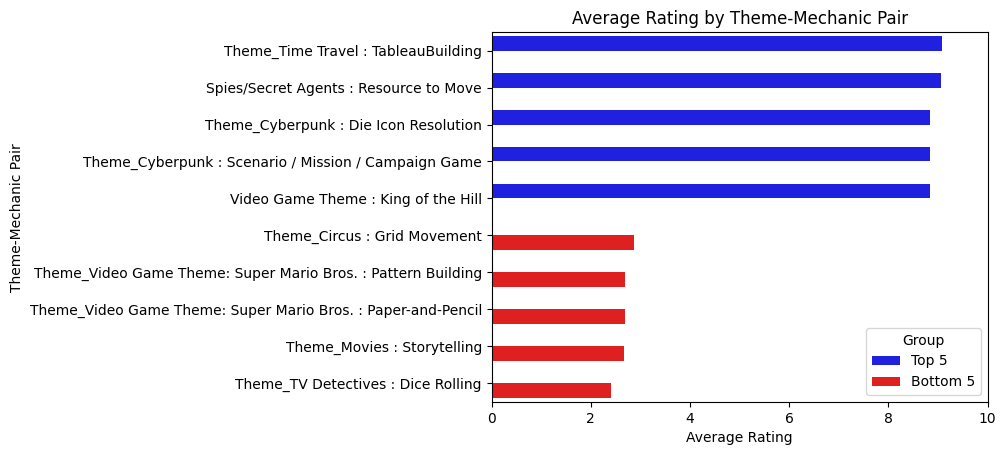

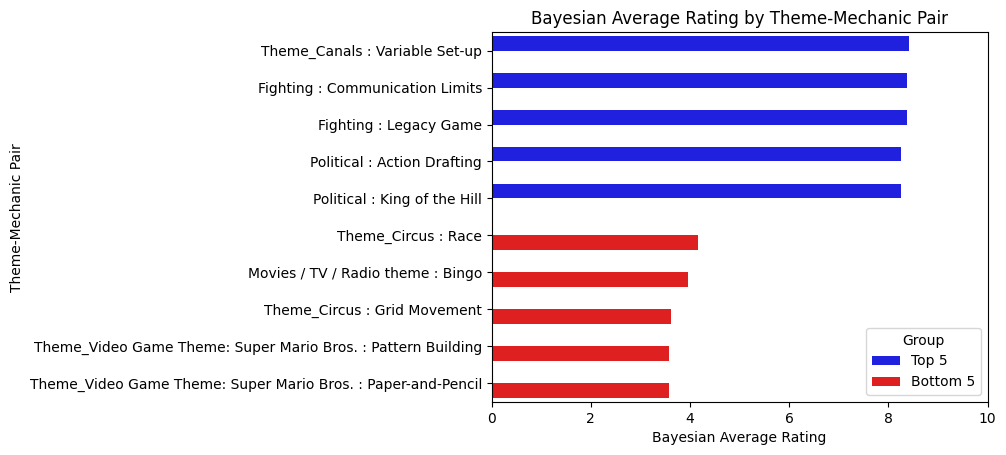

In [ ]:
#create filter for non-null rows
nonNull_filter = ~theme_mechanic_rating_df['AvgRating'].isna()

#extract top and bottom 5 rows
top_5 = theme_mechanic_rating_df[nonNull_filter].sort_values(by= 'AvgRating', ascending= False).head()
bottom_5 = theme_mechanic_rating_df[nonNull_filter].sort_values(by= 'AvgRating', ascending= False).tail()
#give each group a label
top_5['Group'] = 'Top 5'
bottom_5['Group'] = 'Bottom 5'
#combine the groups
top_and_bottom_5 = pd.concat([top_5, bottom_5])

#plot both groups
theme_mech_rating_plot = sns.barplot(data= top_and_bottom_5, y= 'Theme:Mechanic', x= 'AvgRating', hue= 'Group', palette= {'Top 5': 'blue', 'Bottom 5': 'red'})
theme_mech_rating_plot.set_xlim(0,10) #fix axis range
#label plot
plt.title('Average Rating by Theme-Mechanic Pair')
plt.ylabel('Theme-Mechanic Pair')
plt.xlabel('Average Rating')

plt.show()

#spacer
print()
print()

#extract top and bottom 5 rows
top_5_Bayes = theme_mechanic_rating_df[nonNull_filter].sort_values(by= 'BayesAvgRating', ascending= False).head()
bottom_5_Bayes = theme_mechanic_rating_df[nonNull_filter].sort_values(by= 'BayesAvgRating', ascending= False).tail()
#give each group a label
top_5_Bayes['Group'] = 'Top 5'
bottom_5_Bayes['Group'] = 'Bottom 5'
#combine the groups
top_and_bottom_5_Bayes = pd.concat([top_5_Bayes, bottom_5_Bayes])

#plot both groups
theme_mech_rating_plot = sns.barplot(data= top_and_bottom_5_Bayes, y= 'Theme:Mechanic', x= 'BayesAvgRating', hue= 'Group', palette= {'Top 5': 'blue', 'Bottom 5': 'red'})
theme_mech_rating_plot.set_xlim(0,10) #fix axis range
#label plot
plt.title('Bayesian Average Rating by Theme-Mechanic Pair')
plt.ylabel('Theme-Mechanic Pair')
plt.xlabel('Bayesian Average Rating')

plt.show()

From these graphs, we learn that the **theme of Time Travel paired with the mechanic Tableau Building** (a mechanic where players have a set of game components in a "tableau" that determine the actions they can take in the game, which can be added onto or otherwise altered during the game) **is the most popular by average rating** and the **theme of Canals with the mechanic of Variable Set-Up** (a mechanic where the game set-up can be different from game to game, resulting in different starting game states) **is the most highly rated by Bayesian average score**.

Interestingly, we can see the Super Mario Bros. theme appearing in bottom 5 by both metrics. We have seen this theme in the bottom five before. Clearly it is not a popular theme.

##Results



In summary, we learned that *Hexagon Grid and Simulation* are the most commonly paired mechanics and that *being commonly paired is not indicative of game rating* but may be indicative of rating consistency. We also learned that the highest rated board game mechanics are *Delayed Purchase* and *Automatic Resource Growth* by average and Bayesian average rating respectively and the lowest rated mechanic was *Roll/Spin and Move* by both metrics. Likewise, we learned that the highest rated board game themes are *African Americans* and the *Automotive Industry* by average and Bayesian average rating respectively and the lowest rated themes were *Memes* and *Super Mario Bros.* by the same respective metrics. Additionally, we learned that *player count, play time, and game rating do not correlate*. Lastly, we learned that the highest rated pairings of theme and mechanic are *Time Travel with Tableau Building* and *Canals with Variable Set-Up* by average and Bayesian average rating, respectively.

From these results, we may conclude that variables such as player count, play time, and commonality of mechanic pairings are not significant contributors to game ranking. Furthermore, we find that both common and uncommon mechanic pairings generate more consistent (read: predictable) game ratings while mechanic pairings with no correlation tend to generate a wider range of ratings. Additional analysis on this phenomenon may prove to be fruitful.

Our results on which mechanics are most and least favored by the ratings seem to indicate that board game players appreciate deterministic mechanics, such as Delayed Purchase, Automatic Resource Growth,  more than they do mechanics dependent on random chance such as Roll/Spin and Move. This pattern may or may not stand up to scrutiny and may warrant further investigation to verify or debunk. Regardless, it seems that the Roll/Spin and Move mechanic results in lower rating on average, so it should be used sparingly or avoided entirely by game designers and publishers if we consider game rating to be a metric of board game success.

Theme preferences led us to hypothesize that the Bayesian average rating is a better measure of overall preference while the regular average is a closer measure of current trends. We hypothesized that this may a reflection of the affect of current events on preferences. Both of these hypotheses may well be tested in a more targeted analysis on the subject.

Finally, our theme-mechanic pairing results indicate which themes with which mechanics may result in higher (or lower) game ratings. This can be used by game designers and publishers to create higher rating games. We may also conclude from these results that Super Mario Bros. simply does not perform well as a board game theme. This suggests another analysis on whether pop-culture themed games perform better or worse than their non pop-culture counterparts.

##Conclusion

This analysis has identified a number of themes, mechanics, and combinations thereof which may assist a game in its ratings. It has determined that commonality of mechanic pairings, player count, and play time are not useful metrics to consider when trying to optimize game ratings and that player count and play time do not significantly affect one another. Further analysis into the reasons behind preferences in mechanic and themes is recommended.

#####Export Data

In [ ]:
# export cleaned version of games_df
games_df.to_csv('games_cleaned.csv')

In [ ]:
#export lists mechanics and themes
pd.DataFrame({'Mechanic' : mechanics_df.drop(columns= ['BGGId']).columns}).to_csv('mechanic_list.csv')
pd.DataFrame({'Theme' : themes_df.drop(columns= ['BGGId']).columns}).to_csv('theme_list.csv')

In [ ]:
#export ratings by mechanics and themes
mechanic_rating_df.to_csv('mechanic_rating.csv')
theme_rating_df.to_csv('theme_rating.csv')